The dataset from the Blood Transfusion Service Center in Hsin-Chu City, Taiwan, includes 748 randomly selected donors with five variables: Recency, Frequency, Monetary, Time, and a binary indicator for March 2007 donations. The data, collected from a mobile blood donation vehicle visiting universities, aims to predict future blood donations.

The RFMTC model extends the traditional RFM model by adding Time and a Classification variable, enhancing customer segmentation and behavior prediction:

- Recency (R): Months since the last donation.
- Frequency (F): Total number of donations.
- Monetary (M): Total blood donated in cubic centimeters (c.c.)c.c.
- Time (T): Months since the first donation.
- Classification (C): Donation status in a specific month.

This advanced model is particularly useful for customer analysis and targeted marketing in non-profits like blood transfusion centers.

First read the .CSV file located at the file_path into a pandas DataFrame. If successful, it prints a success message; if unsuccessful, it prints an error message.

In [3]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\subag\Downloads\GitHub\properties\100_python\transfusion.csv" 

try:
    # Attempt to read the Excel file into a DataFrame
    df = pd.read_csv(file_path)
    
    # If successful, print a success message
    print('Data read into the dataframe df!')
except Exception as e:
    # If unsuccessful, print an error message
    print(f'Failed to retrieve data from the Excel file. Error: {e}')


Data read into the dataframe df!


Check the data frame and understand each column. Can use df.head() or df.tail() as needed.

In [5]:
df #df.head() or df.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [6]:
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [7]:
df.rename(columns={'whether he/she donated blood in March 2007': 'Donate'},inplace=True) 

In [8]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donate
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [9]:
df.isnull().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
Donate                   0
dtype: int64

In [10]:
correlation_df=df.corr()
correlation_df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donate
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
Donate,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


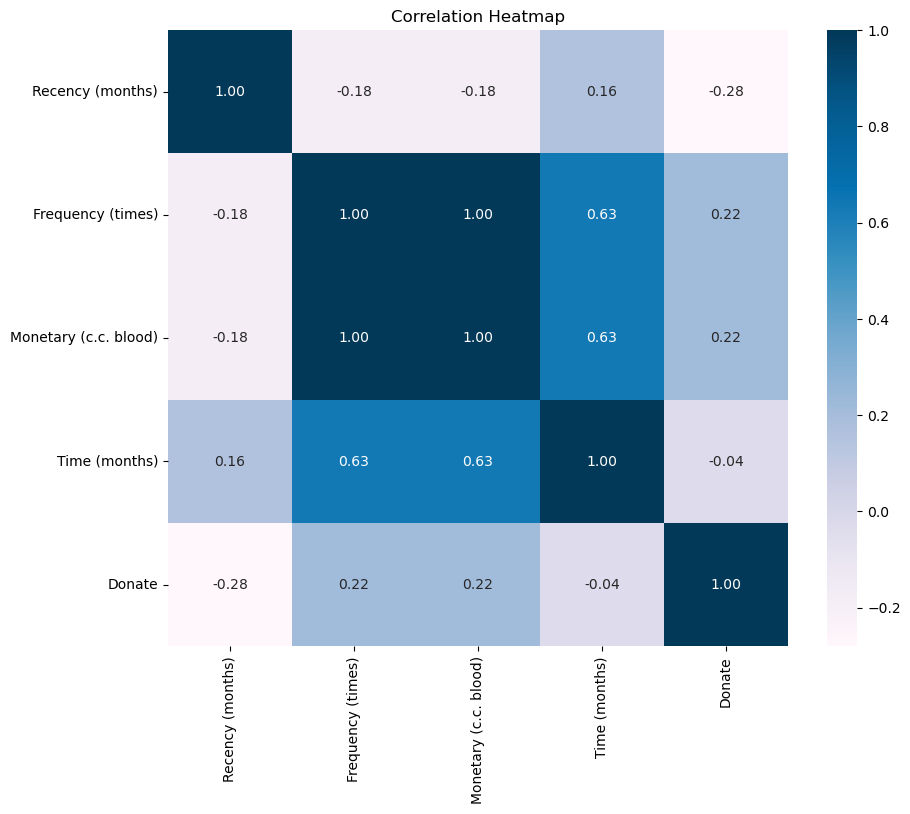

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="PuBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
df.shape

(748, 5)

In [14]:
percentage_counts=df["Donate"].value_counts(normalize=True).round(2)*100
percentage_counts

0    76.0
1    24.0
Name: Donate, dtype: float64

76% did not donate blood inMarch 2007

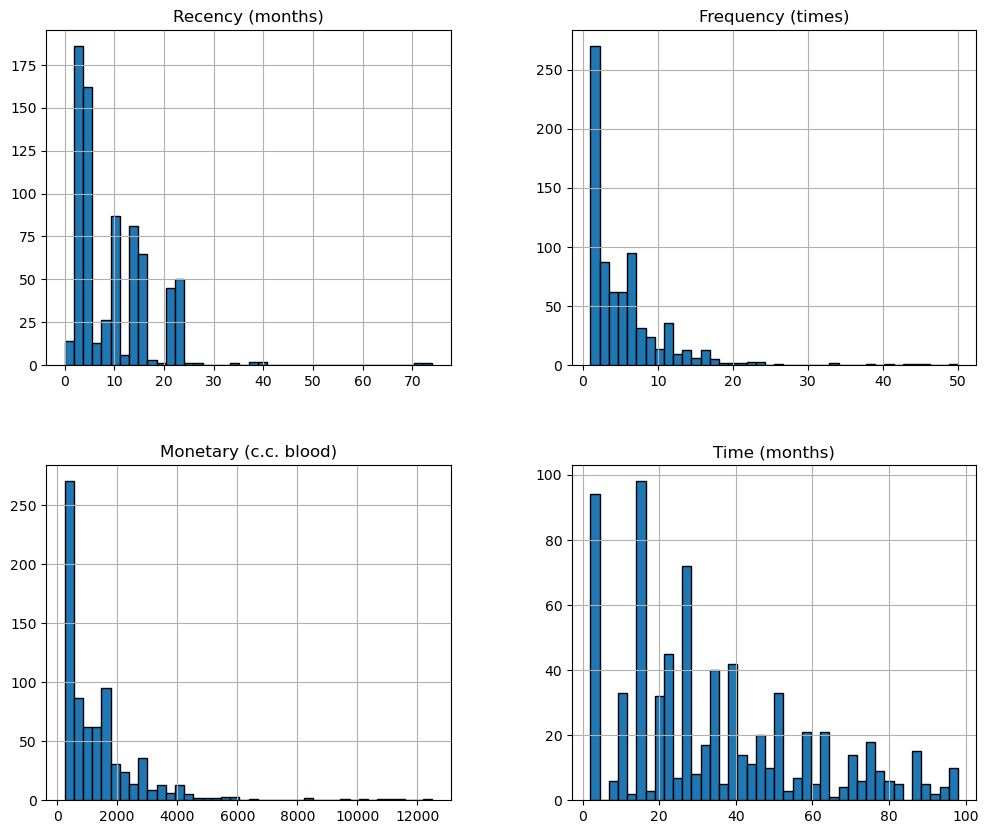

In [16]:
df_drop = df.drop(columns=["Donate"])
df_target = df["Donate"]

bin_size = 40  
df_drop.hist(figsize=(12, 10), bins=bin_size,edgecolor='black')
plt.show()

In [17]:
df_drop.var().round(2)

Recency (months)              65.54
Frequency (times)             34.10
Monetary (c.c. blood)    2131094.23
Time (months)                594.22
dtype: float64

In [18]:
df_target.var()

0.18158194274423892

Min-Max Scaling:
Suitable for data that has a known and definite upper and lower bound.
Preserves the original distribution of the data but scales it to a specific range (typically between 0 and 1).
Useful when you want to preserve the relationships between variables but ensure they fall within a specific range.
Log Normalization:
Suitable for data that is positively skewed or right-skewed, where most values are concentrated towards lower values but there are some extreme high values.
Transforms the data to reduce the skewness and make the distribution more symmetric.
Useful when you want to stabilize variance across different scales and improve the performance of certain algorithms that assume normally distributed data.

In [20]:
#df[collumns].apply(lambda x: np.log(x))

In [21]:
column_list = ['Monetary (c.c. blood)', 'Time (months)']  #or df_drop_copy=X.copy()
#column_list = df_drop_copy.columns.tolist()
#epsilon = 1e-10
for column in column_list:
    df_drop[column] = np.log(df_drop[column])#X[column] = np.log(X[column]+epsilon)

df_drop


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,9.433484,4.584967
1,0,13,8.086410,3.332205
2,1,16,8.294050,3.555348
3,2,20,8.517193,3.806662
4,1,24,8.699515,4.343805
...,...,...,...,...
743,23,2,6.214608,3.637586
744,21,2,6.214608,3.951244
745,23,3,6.620073,4.127134
746,39,1,5.521461,3.663562


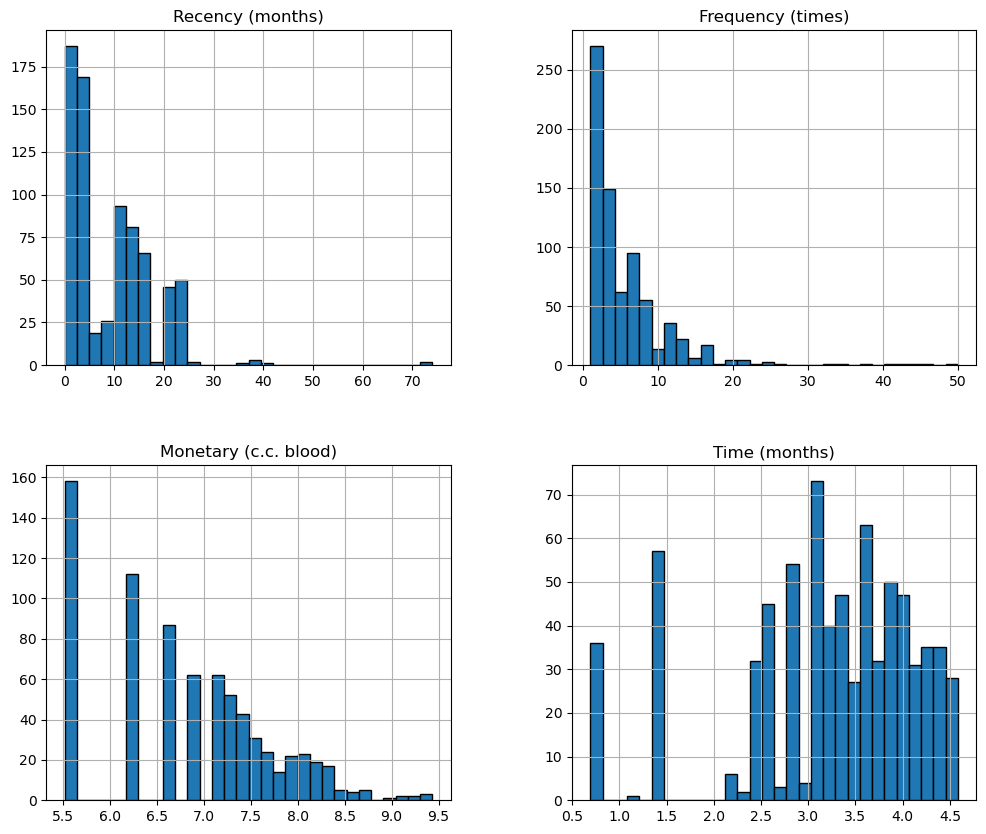

In [22]:
bin_size = 30  
df_drop.hist(figsize=(12, 10), bins=bin_size,edgecolor='black')
plt.show()

In [23]:
#df_drop_copy.var().round(2)

In [24]:
'''
#df_normalized = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols)
df_drop_copy = df_drop.copy()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_drop_copy), columns=df_drop_copy.columns)
'''

'\n#df_normalized = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols)\ndf_drop_copy = df_drop.copy()\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\ndf_normalized = pd.DataFrame(scaler.fit_transform(df_drop_copy), columns=df_drop_copy.columns)\n'

In [25]:
'''
bin_size = 40  
df_normalized.hist(figsize=(12, 10), bins=bin_size,edgecolor='black')
plt.show()
'''

"\nbin_size = 40  \ndf_normalized.hist(figsize=(12, 10), bins=bin_size,edgecolor='black')\nplt.show()\n"

he variable "Monetary (c.c. blood)" has an extremely high variance (2131094.23) compared to the other variables. This indicates a wide range in the values of this variable, which suggests that it is highly skewed. Log scaling would help to normalize this variable and reduce its variance.

Additionally, "Time (months)" has a relatively high variance (594.22) compared to "Recency" and "Frequency." While not as extreme as "Monetary," it may also benefit from log scaling if the distribution is highly skewed.

In [27]:
df_drop.var().round(2)

Recency (months)         65.54
Frequency (times)        34.10
Monetary (c.c. blood)     0.84
Time (months)             0.95
dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X = df_drop
Y = df_target
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, 
    random_state=40,stratify=df["Donate"])

In [29]:
print(X_train.shape,X_test.shape)

(561, 4) (187, 4)


In [30]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
rand_model = RandomForestRegressor()
rand_model.fit(X_train, y_train)
# Evaluate the model
y_pred_train = rand_model.predict(X_train)
y_pred_test = rand_model.predict(X_test)



In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score

#Calculate Mean Abs error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred_test)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 0.282685087647869
Mean Squared Error (MSE): 0.1651167133903382
Root Mean Squared Error (RMSE): 0.40634555908775255
R-squared (R2) Score: 0.08233211211908176


C:\Users\subag\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:

r2_train = r2_score(y_train, y_pred_train)
print("R-squared (R2) Score:", r2_train)

R-squared (R2) Score: 0.6591536920854577


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


models = {
    "Logistic Regression": LogisticRegression(C=10),
    "SVM": SVC(C=0.5),
    "Decision Tree": DecisionTreeClassifier( max_depth=4),
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.01),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=38, random_state=42)
}
results = []
for name, model in models.items():
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_pred = model.predict(X_test)

  train_acc= accuracy_score(y_train, y_train_pred)
  test_acc= accuracy_score(y_test, y_pred)
  results.append([name, train_acc, test_acc])

df_results = pd.DataFrame(results, columns=["Model Name", "Training accuracy", "Test accuracy"])
df_results

,Model Name,Training accuracy,Test accuracy
0,Logistic Regression,0.770053,0.775401
1,SVM,0.768271,0.770053
2,Decision Tree,0.803922,0.807487
3,KNN,0.832442,0.791444
4,Gradient Boosting,0.766488,0.764706
5,Random Forest Classifier,0.934046,0.791444


In [81]:
from sklearn.metrics import classification_report

model= RandomForestClassifier(n_estimators= 38)  
model.fit(X_train, y_train) 
y_predictions = model.predict(X_test)
y_train_predictions = model.predict(X_train)

In [83]:
from sklearn.metrics import confusion_matrix

print("Test_Set")
print(confusion_matrix(y_test, y_predictions))
print(classification_report(y_test, y_predictions))

Test_Set
[[132  11]
 [ 35   9]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       143
           1       0.45      0.20      0.28        44

    accuracy                           0.75       187
   macro avg       0.62      0.56      0.57       187
weighted avg       0.71      0.75      0.72       187



In [85]:
print("Train_Set")
print(confusion_matrix(y_train, y_train_predictions))
print(classification_report(y_train, y_train_predictions))

Train_Set
[[421   6]
 [ 32 102]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       427
           1       0.94      0.76      0.84       134

    accuracy                           0.93       561
   macro avg       0.94      0.87      0.90       561
weighted avg       0.93      0.93      0.93       561



In [38]:
#!pip install tpot

In [39]:
#pip install --upgrade scikit-learn


In [40]:
#pip install --upgrade tpot


In [41]:
#pip uninstall tpot scikit-learn


In [42]:
#pip install tpot==0.11.7 scikit-learn==0.24.2

  Using cached TPOT-0.11.7-py3-none-any.whl (87 kB)
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [54 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\subag\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", li

In [43]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score,accuracy_score

    
tpot = TPOTClassifier(
    generations=7,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')


print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {transform}')


Optimization Progress:   0%|          | 0/160 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7432469278707309

Generation 2 - Current best internal CV score: 0.7432469278707309

Generation 3 - Current best internal CV score: 0.7438929227027722

Generation 4 - Current best internal CV score: 0.7496788538512205

Generation 5 - Current best internal CV score: 0.7496788538512205

Generation 6 - Current best internal CV score: 0.7572338949493532

Generation 7 - Current best internal CV score: 0.7572338949493532

Best pipeline: KNeighborsClassifier(MaxAbsScaler(input_matrix), n_neighbors=38, p=2, weights=uniform)

AUC score: 0.7823

Best pipeline steps:
1. MaxAbsScaler()
2. KNeighborsClassifier(n_neighbors=38)


- TPOTClassifier is an automated machine learning tool that optimizes machine learning pipelines using genetic programming.
- roc_auc_score is a function from sklearn that computes the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

In [45]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the configurations
configurations = [
    {'name': 'accuracy', 'scoring': accuracy_score},
    {'name': 'precision', 'scoring': precision_score},
    {'name': 'f1', 'scoring': f1_score},
    {'name': 'recall', 'scoring': recall_score}
]

# Loop through configurations
for config in configurations:
    print(f'\nEvaluating with scoring: {config["name"]}')
    
    tpot = TPOTClassifier(
        generations=7,
        population_size=40,
        verbosity=2,
        scoring=config['name'],
        random_state=42,
        disable_update_check=True,
        config_dict='TPOT light'
    )
    tpot.fit(X_train, y_train)
    
    score = config['scoring'](y_test, tpot.predict(X_test))
    
    print(f'\n{config["name"].capitalize()} score: {score:.4f}')
    
    print('\nBest pipeline steps:', end='\n')
    for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
        print(f'{idx}. {transform}')



Evaluating with scoring: accuracy


Optimization Progress:   0%|          | 0/320 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7789190897597977

Generation 2 - Current best internal CV score: 0.7789190897597977

Generation 3 - Current best internal CV score: 0.7789348925410873

Generation 4 - Current best internal CV score: 0.7789348925410873

Generation 5 - Current best internal CV score: 0.7789348925410873

Generation 6 - Current best internal CV score: 0.7789348925410873

Generation 7 - Current best internal CV score: 0.7789348925410874

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=10, min_samples_leaf=19, min_samples_split=15)

Accuracy score: 0.8021

Best pipeline steps:
1. DecisionTreeClassifier(max_depth=10, min_samples_leaf=19, min_samples_split=15,
                       random_state=42)

Evaluating with scoring: precision


Optimization Progress:   0%|          | 0/320 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7666666666666666

Generation 2 - Current best internal CV score: 0.7666666666666666

Generation 3 - Current best internal CV score: 0.7666666666666666

Generation 4 - Current best internal CV score: 0.8

Generation 5 - Current best internal CV score: 0.8

Generation 6 - Current best internal CV score: 0.8

Generation 7 - Current best internal CV score: 0.8

Best pipeline: LogisticRegression(MaxAbsScaler(input_matrix), C=5.0, dual=False, penalty=l2)

Precision score: 0.6667

Best pipeline steps:
1. MaxAbsScaler()
2. LogisticRegression(C=5.0, random_state=42)

Evaluating with scoring: f1


Optimization Progress:   0%|          | 0/320 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.49547255965734227

Generation 2 - Current best internal CV score: 0.49884501504417356

Generation 3 - Current best internal CV score: 0.49884501504417356

Generation 4 - Current best internal CV score: 0.49884501504417356

Generation 5 - Current best internal CV score: 0.49884501504417356

Generation 6 - Current best internal CV score: 0.49884501504417356

Generation 7 - Current best internal CV score: 0.49884501504417356

Best pipeline: MultinomialNB(Normalizer(input_matrix, norm=l1), alpha=100.0, fit_prior=False)

F1 score: 0.5405

Best pipeline steps:
1. Normalizer(norm='l1')
2. MultinomialNB(alpha=100.0, fit_prior=False)

Evaluating with scoring: recall


Optimization Progress:   0%|          | 0/320 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.962962962962963

Generation 2 - Current best internal CV score: 0.962962962962963

Generation 3 - Current best internal CV score: 0.962962962962963

Generation 4 - Current best internal CV score: 0.962962962962963

Generation 5 - Current best internal CV score: 0.962962962962963

Generation 6 - Current best internal CV score: 0.962962962962963

Generation 7 - Current best internal CV score: 0.962962962962963

Best pipeline: MultinomialNB(Binarizer(input_matrix, threshold=0.9500000000000001), alpha=100.0, fit_prior=False)

Recall score: 0.9773

Best pipeline steps:
1. Binarizer(threshold=0.9500000000000001)
2. MultinomialNB(alpha=100.0, fit_prior=False)


In [46]:
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [47]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donate
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [53]:
selected_columns = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)']
RFM_df=df[selected_columns]
RFM_df

,Recency (months),Frequency (times),Monetary (c.c. blood)
0,2,50,12500
1,0,13,3250
2,1,16,4000
3,2,20,5000
4,1,24,6000
...,...,...,...
743,23,2,500
744,21,2,500
745,23,3,750
746,39,1,250


In [89]:
X_RFM = RFM_df
y_RFM = df['Donate']


X_RFM_train, X_RFM_test, y_RFM_train, y_RFM_test = train_test_split(X_RFM, y_RFM, test_size=0.3, random_state=42)

# Train model (e.g., Random Forest)
model_RFM = RandomForestClassifier(n_estimators=38, random_state=42)
model_RFM.fit(X_RFM_train, y_RFM_train)

# Make predictions
y_RFM_pred = model_RFM.predict(X_RFM_test)
y_RFM_pred_proba = model_RFM.predict_proba(X_RFM_test)[:, 1]

# Evaluate the model
accuracy_RFM = accuracy_score(y_RFM_test, y_RFM_pred)
roc_auc_RFM = roc_auc_score(y_RFM_test, y_RFM_pred_proba)

print(f'Accuracy: {accuracy_RFM:.4f}')
print(f'ROC-AUC: {roc_auc_RFM:.4f}')

Accuracy: 0.7600
ROC-AUC: 0.6153
